In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/sample_data/Dataset_ecommerce.csv',parse_dates=['InvoiceDate'])

In [ ]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,135080
StockCode,0
Description,0
Quantity,0
UnitPrice,0
Country,0


In [ ]:
df=df.dropna(subset=['CustomerID'])

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
InvoiceDate,0
CustomerID,0
StockCode,0
Description,0
Quantity,0
UnitPrice,0
Country,0


In [ ]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [ ]:
num_customers = df['CustomerID'].nunique()
num_transactions = df['InvoiceNo'].nunique()
num_products = df['StockCode'].nunique()

In [ ]:
print(f'Number of Uniques Customers {num_customers}')
print(f'Number of Transactions {num_transactions}')
print(f'Number of Products {num_products}')

Number of Uniques Customers 4372
Number of Transactions 22190
Number of Products 9000


In [ ]:
date_range = (df['InvoiceDate'].min(), df['InvoiceDate'].max())

In [ ]:
print(f'Transaction Period: {date_range[0]},{date_range[1]}')

Transaction Period: 2010-12-01 08:26:00,2011-12-09 12:50:00


In [ ]:
print(f'Rows with negative quantity: {(df.Quantity <=0).sum()}')

Rows with negative quantity: 0


In [ ]:
print(f'Rows with negative unitprice: {(df.UnitPrice <=0).sum()}')

Rows with negative unitprice: 0


In [ ]:
top_countries = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head()

In [ ]:
print(top_countries)

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Name: CustomerID, dtype: int64


/tmp/ipython-input-3028856098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


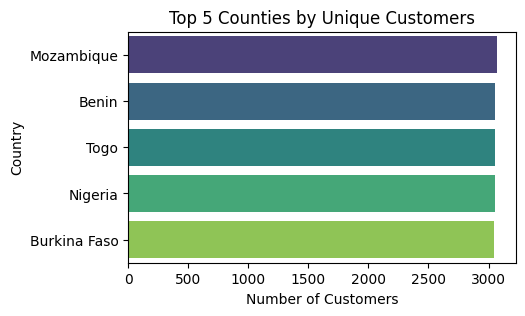

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 5 Counties by Unique Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

/tmp/ipython-input-2404060041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


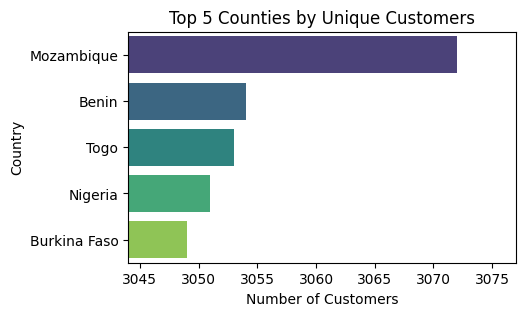

In [ ]:
plt.figure(figsize=(5,3))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlim(min(top_countries.values)-5, max(top_countries.values)+5)
plt.title('Top 5 Counties by Unique Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show()

In [ ]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

In [ ]:
df['Revenue'] = df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50


In [ ]:
monthly_sales = df.groupby('InvoiceMonth')['Revenue'].sum()

In [ ]:
monthly_sales

,Revenue
InvoiceMonth,
2010-12,6.792367e+07
2011-01,5.582933e+07
2011-02,5.208536e+07
2011-03,7.137210e+07
2011-04,5.914003e+07
2011-05,7.434151e+07
2011-06,7.109639e+07
2011-07,7.040789e+07
2011-08,6.994326e+07


In [ ]:
monthly_sales = df.groupby('InvoiceMonth')['Revenue'].sum().reset_index()

In [ ]:
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].astype(str)

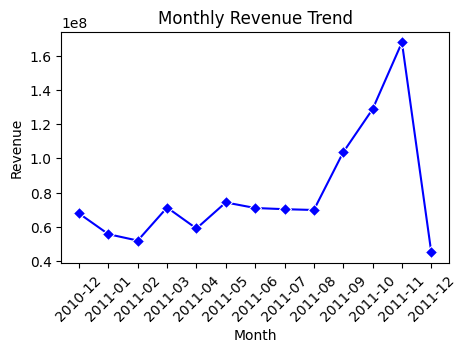

In [ ]:
plt.figure(figsize=(5,3))
sns.lineplot (x='InvoiceMonth', y='Revenue', data=monthly_sales, marker ='D', color='blue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

Cohort Analysis


In [ ]:
Cohort_data = df.groupby('CustomerID')['InvoiceMonth'].min()

In [ ]:
Cohort_data.name = 'CohortMonth'

In [ ]:
Cohort_data

,CohortMonth
CustomerID,
12346,2011-01
12347,2010-12
12348,2010-12
12349,2011-11
12350,2011-02
...,...
18280,2011-03
18281,2011-06
18282,2011-08


In [ ]:
df= df.merge(Cohort_data, on='CustomerID')

In [ ]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12


In [ ]:
Invoice_year, Invoice_month = df['InvoiceMonth'].dt.year, df['InvoiceMonth'].dt.month

In [ ]:
Cohort_year, Cohort_month = df['CohortMonth'].dt.year, df['CohortMonth'].dt.month

In [ ]:
Year_diff = Invoice_year - Cohort_year
Month_diff = Invoice_month - Cohort_month

In [ ]:
df['Cohort_Index'] = Year_diff * 12 + Month_diff +1

In [ ]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,InvoiceMonth,Revenue,CohortMonth,Cohort_Index
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12,664.95,2010-12,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12,1862.95,2010-12,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12,4796.22,2010-12,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12,370.95,2010-12,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12,1941.50,2010-12,1


In [ ]:
Cohort_counts = df.groupby(['CohortMonth', 'Cohort_Index'])['CustomerID'].nunique().reset_index()

In [ ]:
Cohort_pivot = Cohort_counts.pivot(index = 'CohortMonth', columns = 'Cohort_Index', values = 'CustomerID')

In [ ]:
Cohort_pivot

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Retention Rate


In [ ]:
cohort_size = Cohort_pivot.iloc[:,0]
retention = Cohort_pivot.divide(cohort_size, axis = 0).round(3)
retention

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.382,0.334,0.387,0.360,0.397,0.380,0.354,0.354,0.395,0.373,0.50,0.274
2011-01,1.0,0.240,0.283,0.242,0.328,0.299,0.261,0.257,0.311,0.347,0.368,0.15,NaN
2011-02,1.0,0.247,0.192,0.279,0.268,0.247,0.255,0.282,0.258,0.313,0.092,NaN,NaN
2011-03,1.0,0.191,0.255,0.218,0.232,0.177,0.264,0.239,0.289,0.089,NaN,NaN,NaN
2011-04,1.0,0.227,0.221,0.211,0.207,0.237,0.231,0.261,0.084,NaN,NaN,NaN,NaN
2011-05,1.0,0.237,0.172,0.172,0.215,0.244,0.265,0.104,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.209,0.187,0.272,0.247,0.336,0.102,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209,0.204,0.230,0.272,0.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251,0.251,0.251,0.138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Visualization

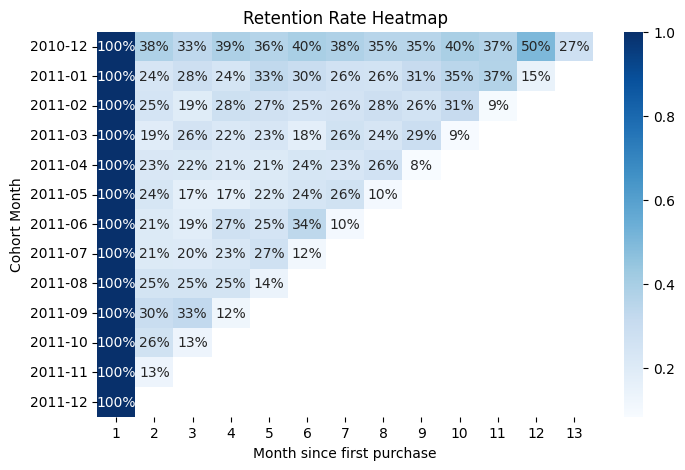

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap (retention, annot=True, fmt='.0%', cmap= 'Blues')
plt.title('Retention Rate Heatmap')
plt.xlabel('Month since first purchase')
plt.ylabel('Cohort Month')
plt.show()

In [ ]:
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x:(reference_date - x.max()).days,
    'InvoiceNo': pd.Series.nunique,
    'Revenue': 'sum'
}).reset_index()

In [ ]:
rfm.columns = ['CustomerID', 'Recency_days', 'Frequency', 'Monetary']

In [ ]:
rfm.head()

,CustomerID,Recency_days,Frequency,Monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [ ]:
rfm.describe()

,Recency_days,Frequency,Monetary
count,4372.000000,4372.000000,4.372000e+03
mean,92.047118,5.075480,2.372909e+05
std,100.765435,9.338754,5.944603e+05
min,1.000000,1.000000,1.736000e+01
25%,17.000000,1.000000,4.350893e+04
50%,50.000000,3.000000,1.066925e+05
75%,143.000000,5.000000,2.599154e+05
max,374.000000,248.000000,2.038383e+07


In [ ]:
rfm.columns

Index(['CustomerID', 'Recency_days', 'Frequency', 'Monetary'], dtype='object')

In [ ]:
X = rfm[['Recency_days', 'Frequency', 'Monetary']].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
X_scaled = ss.fit_transform(X)

In [ ]:
X_scaled [:5]

array([[ 2.32202285, -0.32936215, -0.39022789],
       [-0.89373323,  0.20610242,  0.32673724],
       [-0.1691956 , -0.11517632, -0.26062315],
       [-0.72500529, -0.43645506, -0.1029888 ],
       [ 2.16322008, -0.43645506, -0.31816948]])

Clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
Inertia = []
S_score = []
K_range = range(2,12)

In [ ]:
for K in K_range:
  km = KMeans(n_clusters=K, random_state=42, n_init=10)
  labels = km.fit_predict(X_scaled)
  Inertia.append(km.inertia_)
  S_score.append(silhouette_score(X_scaled, labels))

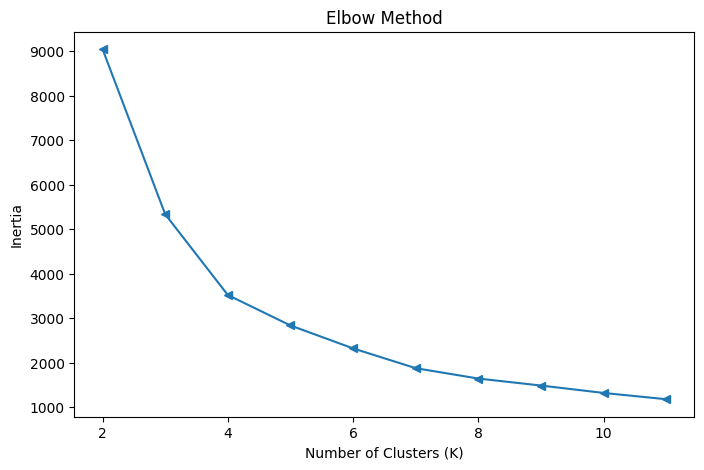

In [ ]:
from typing import Text
plt.figure(figsize=(8,5))
plt.plot(K_range, Inertia, marker='<')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

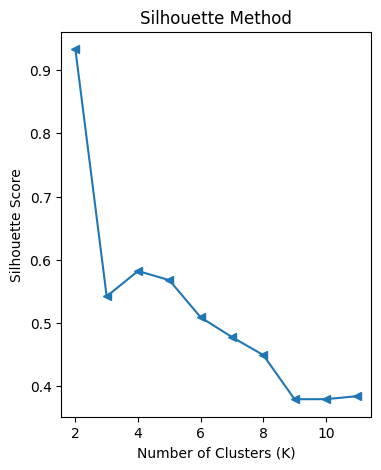

In [ ]:
plt.figure(figsize=(4,5))
plt.plot(K_range, S_score, marker='<')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [ ]:
!pip install yellowbrick


In [ ]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

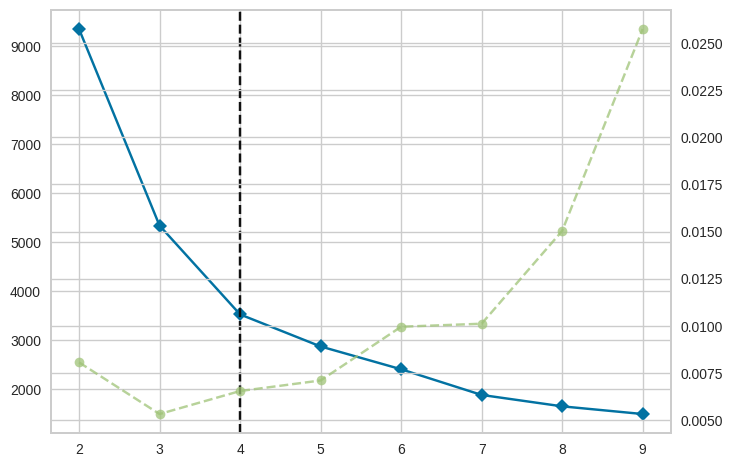

In [ ]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_scaled)

In [ ]:
final_k = 4
final_model = KMeans(n_clusters=final_k, random_state=42)


In [ ]:
final_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
rfm.head()

,CustomerID,Recency_days,Frequency,Monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [ ]:
rfm['cluster'] = final_model.labels_

In [ ]:
rfm.head()

,CustomerID,Recency_days,Frequency,Monetary,cluster
0,12346,326,2,5342.40,1
1,12347,2,7,431501.00,0
2,12348,75,4,82378.47,0
3,12349,19,1,176075.12,0
4,12350,310,1,48173.37,1


CLUSTER PROFILE

In [ ]:
cluster_profile = rfm.groupby('cluster').agg({
    'Recency_days': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).round(1)

In [ ]:
cluster_profile

,Recency_days,Frequency,Monetary,NumCustomers
cluster,,,,
0,43.4,4.2,195421.0,3023
1,248.9,1.8,69191.6,1077
2,1.7,153.5,12345024.6,6
3,11.8,25.3,1120633.6,266


In [ ]:
cluster_names = {
    0: 'Loyal Regulars',
    1: 'At Risk',
    2: 'VIPS',
    3: 'Potential'
    }

In [ ]:
cluster_profile['segment'] = cluster_profile.index.map(cluster_names)

In [ ]:
df_plot = cluster_profile.copy()

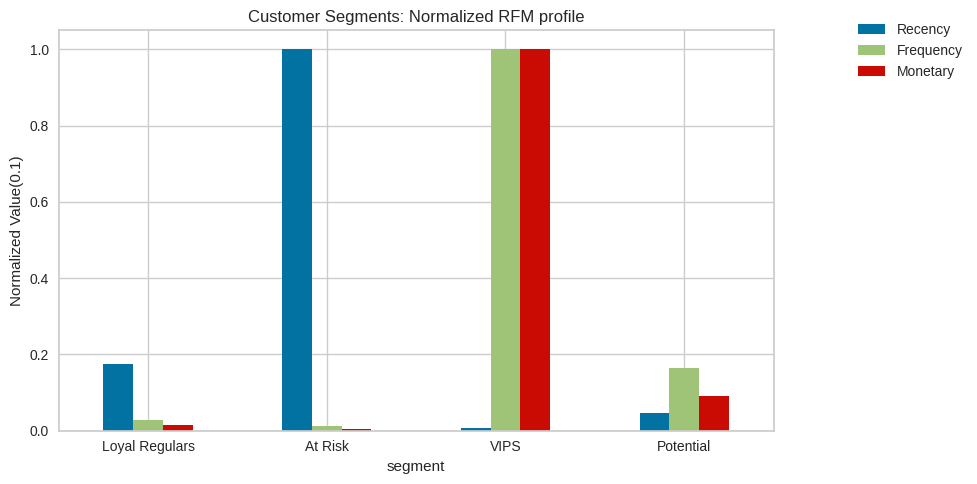

In [ ]:
df_plot[['recency', 'frequency', 'monetary']] = df_plot[['Recency_days', 'Frequency', 'Monetary']].apply(lambda x: x/x.max()
)
df_plot.set_index('segment')[['recency', 'frequency', 'monetary']].plot(kind='bar', figsize=(10,5)
)
plt.title('Customer Segments: Normalized RFM profile')
plt.ylabel('Normalized Value(0.1)')
plt.xticks(rotation=0)
plt.legend(['Recency', 'Frequency', 'Monetary'], bbox_to_anchor=(1.1, 1.05), loc='upper left')
plt.tight_layout()
plt.show()

How do you find which month or cohort brought in the most valuable customers?

In [ ]:
VIPS = rfm[rfm['cluster'] == 2].copy()

In [ ]:
VIPS

,CustomerID,Recency_days,Frequency,Monetary,cluster
330,12748,1,224,11912482.34,2
1300,14096,4,34,12965429.74,2
1674,14606,1,128,7144512.92,2
1895,14911,1,248,15362741.47,2
2192,15311,1,118,6301150.63,2
4042,17841,2,169,20383830.65,2


In [ ]:
Customer_cohort = df[['CustomerID', 'CohortMonth']].drop_duplicates()

In [ ]:
Customer_cohort

,CustomerID,CohortMonth
0,17850,2010-12
9,13047,2010-12
26,12583,2010-12
46,13748,2010-12
65,15100,2010-12
...,...,...
403812,13436,2011-12
403893,15520,2011-12
404640,13298,2011-12
405385,14569,2011-12


My first git version control